# CALCULATE STANDARD TIMES - PART TWO

## Outline
+ Pretty much the same goal as Part One which was:
+ The goal of the notebook is to calculate a standard time for each configuration of racecourse, racetype and distance.

In [2]:
# set up, imports and configuration
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.rcParams['agg.path.chunksize'] = 10000
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

## Getting the Data

In [2]:
# Read wintimes from csv file
wintimes = pd.read_csv("/home/benjamin/Documents/form_study/data/timeform/csv/analysis/wintimes.csv")
len(wintimes)

NameError: name 'pd' is not defined

In [1]:
wintimes.info()

NameError: name 'wintimes' is not defined

In [3]:
# Drop wintime NAs especially so that the percentile functions work
wintimes = wintimes.dropna(subset=['wintime'], how='any')
wintimes.describe()

/home/benjamin/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Unnamed: 0,raceID,racecourse,distance,raceclass,wintime
count,170581.000000,1.705810e+05,170581.000000,170581.000000,135947.000000,170581.000000
mean,57567.306365,3.437097e+10,69.820941,13.169629,4.384510,189.990310
std,34247.939257,4.413052e+10,74.606599,6.353162,1.357325,107.750126
min,0.000000,1.110001e+09,1.000000,0.000000,1.000000,0.010000
25%,27585.000000,1.231050e+10,23.000000,7.040000,NaN,90.480000
50%,57177.000000,1.411091e+10,41.000000,12.000000,NaN,156.690000
75%,85627.000000,1.581150e+10,58.000000,18.000000,NaN,274.350000
max,131798.000000,1.601081e+11,229.000000,36.000000,7.000000,660.060000


## Cleaning the Data

Right, I'm going to examine all the unique data values so they don't come back and bite me later.

In [4]:
wintimes.info()
len(wintimes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170581 entries, 0 to 170726
Data columns (total 11 columns):
Unnamed: 0    170581 non-null int64
raceID        170581 non-null float64
racedate      170581 non-null object
racecourse    170581 non-null float64
distance      170581 non-null float64
going         170581 non-null object
raceclass     135947 non-null float64
racetype      170581 non-null object
racetype2     170581 non-null object
age_cond      170581 non-null object
wintime       170581 non-null float64
dtypes: float64(5), int64(1), object(5)
memory usage: 12.4+ MB


170581

In [5]:
# Excuse me while I convert going to a numbered dict
goingDict = {'fast': 1, 'firm': 2, 'good-firm': 3, 'standard': 4, 'good': 5, 'good-soft': 6, 'slow': 7, 'soft': 8 ,'heavy': 9 }
wintimes = wintimes.replace({"going": goingDict})

In [6]:
# racecourses should be integer values.
# racecourse 213 is maison laffitte which I don't want.
# wintimes.racecourse.value_counts()
wintimes.racecourse = wintimes.racecourse.astype(int)
wintimes = wintimes.drop(wintimes[wintimes.racecourse==213].index)
len(wintimes)

170569

In [7]:
# Wow, I managed to remove a zero from a pandas dataframe!
# wintimes.distance.value_counts()
wintimes = wintimes.drop(wintimes[wintimes.distance==0.00].index)
len(wintimes)

170568

In [8]:
# convert racetype2 to a numbered dict
wintimes.racetype2.value_counts()
type2dict = {'Flat': 1, 'Hurdle': 2, 'Chase' : 3, 'National Hunt Flat' : 4}
wintimes = wintimes.replace({"racetype2": type2dict})
# wintimes.describe()

In [9]:
# reduce number of age_cond categories
age_condict = {'9yo+': 'N/A', '2yo+': 'N/A', '0yo+': 'N/A', '7yo+' : 'N/A', '8yo' : 'N/A', '8yo+': 'N/A'}
wintimes = wintimes.replace({"age_cond": age_condict})
# wintimes.age_cond.value_counts()

In [10]:
# Fairly simple to convert the race dates to pandas datetime format 
wintimes['racedate'] = pd.to_datetime(wintimes['racedate'])

In [11]:
wintimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170568 entries, 0 to 170726
Data columns (total 11 columns):
Unnamed: 0    170568 non-null int64
raceID        170568 non-null float64
racedate      170568 non-null datetime64[ns]
racecourse    170568 non-null int32
distance      170568 non-null float64
going         170568 non-null int64
raceclass     135947 non-null float64
racetype      170568 non-null object
racetype2     170568 non-null int64
age_cond      170568 non-null object
wintime       170568 non-null float64
dtypes: datetime64[ns](1), float64(4), int32(1), int64(3), object(2)
memory usage: 13.7+ MB


In [12]:
wintimes.describe()

,Unnamed: 0,raceID,racecourse,distance,going,raceclass,racetype2,wintime
count,170568.000000,1.705680e+05,170568.000000,170568.000000,170568.000000,135947.000000,170568.000000,170568.000000
mean,57565.429143,3.436434e+10,69.810064,13.170123,5.114494,4.384510,1.672899,189.998031
std,34248.121914,4.412568e+10,74.599036,6.353122,2.143778,1.357325,0.889199,107.750510
min,0.000000,1.110001e+09,1.000000,5.000000,1.000000,1.000000,1.000000,0.010000
25%,27584.000000,1.231041e+10,23.000000,7.040000,3.000000,NaN,1.000000,90.480000
50%,57173.500000,1.411090e+10,41.000000,12.000000,5.000000,NaN,1.000000,156.700000
75%,85626.000000,1.581150e+10,58.000000,18.000000,6.000000,NaN,2.000000,274.392500
max,131798.000000,1.601081e+11,229.000000,36.000000,9.000000,7.000000,4.000000,660.060000


## Remove Outliers
My useful remove outliers method from part one.

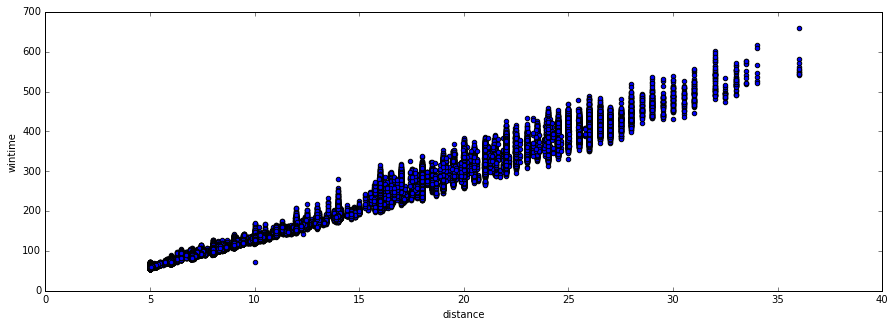

In [13]:
statsdf = wintimes.groupby(['racecourse','racetype2','distance']).wintime.agg(['mean', 'std','count']).reset_index()
wintimes = pd.merge(wintimes, statsdf, how='left', on=['racecourse','racetype2','distance'])
wintimes = wintimes.dropna(subset=['mean', 'std', 'wintime', 'count'], how='any')
wintimes['stdx3'] = wintimes['std'] * 3
wintimes['windiff'] = abs(wintimes['wintime'] - wintimes['mean'])
wintimes = wintimes[wintimes.windiff < wintimes.stdx3]
wintimes.drop(['windiff','stdx3','mean','std'], axis=1, inplace=True)
wintimes = wintimes[(wintimes['count'] > 5)]
wintimes.plot(kind='scatter', x='distance', y='wintime')

In [14]:
len(wintimes)

167990

In [15]:
# I'll write to a new csv file here
wintimes.to_csv("/home/benjamin/Documents/form_study/data/timeform/csv/analysis/clean_wintimes.csv")

## Calculate Standard Times (maybe...)

In [16]:
# Giving me a shorter method to read it all back
wintimes = pd.read_csv("/home/benjamin/Documents/form_study/data/timeform/csv/analysis/clean_wintimes.csv")
len(wintimes)

167990

In [17]:
wintimes.describe()

,Unnamed: 0,Unnamed: 0.1,raceID,racecourse,distance,going,raceclass,racetype2,wintime,count
count,167990.000000,167990.000000,1.679900e+05,167990.000000,167990.000000,167990.000000,133952.000000,167990.000000,167990.000000,167990.000000
mean,85158.914120,57409.872969,3.432773e+10,69.762528,13.138798,5.086338,4.387236,1.668826,189.334123,351.166534
std,48976.759614,34199.839918,4.409543e+10,74.534571,6.339263,2.131568,1.355758,0.886513,107.393266,367.565360
min,0.000000,0.000000,1.110001e+09,1.000000,5.000000,1.000000,1.000000,1.000000,53.690000,6.000000
25%,42825.250000,27480.000000,1.231051e+10,23.000000,7.040000,3.000000,NaN,1.000000,90.290000,126.000000
50%,85197.000000,56997.500000,1.411091e+10,41.000000,12.000000,5.000000,NaN,1.000000,156.100000,223.000000
75%,127510.750000,85321.000000,1.581150e+10,58.000000,18.000000,6.000000,NaN,2.000000,273.200000,398.000000
max,170567.000000,131798.000000,1.601081e+11,229.000000,36.000000,9.000000,7.000000,4.000000,660.060000,1571.000000


In [18]:
std_times = wintimes.groupby(['racecourse','racetype2','distance']).wintime.quantile(.05).reset_index()

In [19]:
std_times.head()

,racecourse,racetype2,distance,wintime
0,1,1,5.0,59.1100
1,1,1,6.0,72.4915
2,1,1,6.5,80.7430
3,1,1,7.0,85.9000
4,1,1,8.0,98.3240


In [20]:
std_times.rename(columns={'wintime':'std_time'}, inplace=True)
std_times.head()

,racecourse,racetype2,distance,std_time
0,1,1,5.0,59.1100
1,1,1,6.0,72.4915
2,1,1,6.5,80.7430
3,1,1,7.0,85.9000
4,1,1,8.0,98.3240


In [21]:
wintimes = pd.merge(wintimes, std_times, how='outer', on=['racecourse','racetype2','distance'])

In [22]:
wintimes.head()

,Unnamed: 0,Unnamed: 0.1,raceID,racedate,racecourse,distance,going,raceclass,racetype,racetype2,age_cond,wintime,count,std_time
0,0,0,1.110001e+09,2000-01-15,1,20.0,6,3.0,Novices' Hurdle,2,5yo+,324.91,40,292.019
1,6,40,1.110001e+09,2000-01-21,1,20.0,5,3.0,Novices' Hurdle,2,5yo,313.55,40,292.019
2,13,103,1.110002e+09,2000-02-19,1,20.0,6,2.0,Handicap Hurdle,2,4yo+,311.88,40,292.019
3,23,182,1.110004e+09,2000-04-01,1,20.0,3,3.0,Novices' Hurdle,2,4yo+,299.21,40,292.019
4,26,209,1.110004e+09,2000-04-05,1,20.0,8,3.0,Novices' Hurdle,2,4yo+,313.12,40,292.019


In [23]:
# And write the bugger to a .csv file
std_times.to_csv("/home/benjamin/Documents/form_study/data/timeform/csv/analysis/std_times.csv")

In [24]:
# Here's Ascot on the flat
std_times[(std_times.racecourse==1) & (std_times.racetype2==1)]

,racecourse,racetype2,distance,std_time
0,1,1,5.00,59.1100
1,1,1,6.00,72.4915
2,1,1,6.50,80.7430
3,1,1,7.00,85.9000
4,1,1,8.00,98.3240
5,1,1,10.00,123.8985
6,1,1,12.00,147.6680
7,1,1,14.00,179.9515
8,1,1,16.00,205.3120
9,1,1,16.20,209.1270


In [25]:
# Oh dear, I've lost my racecourse listing so I've no idea where this is. Hereford for chasing?
# What a mess this has all got.
std_times[(std_times.racecourse==24) & (std_times.racetype2==3)]

,racecourse,racetype2,distance,std_time
386,24,3,16.50,236.451
387,24,3,20.07,309.080
388,24,3,20.50,300.098
389,24,3,23.00,349.840
390,24,3,25.00,375.190
391,24,3,32.00,521.871


## Statistical Analysis

A final plot below exhibits a nice tidy plotting convention. It also shows how difficult I've found it to produce any sensible visualisation of this data. This isn't really statistical analysis. It's just a pretty plot.

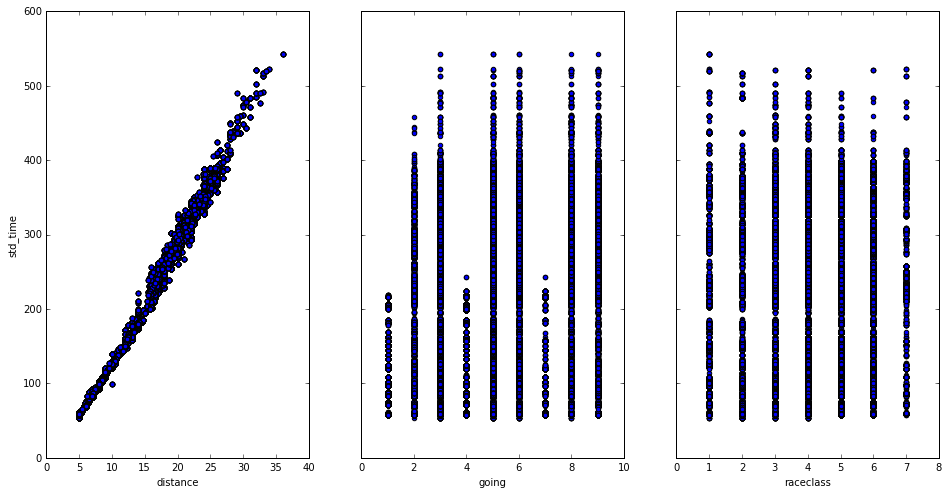

In [26]:
fig, axs = plt.subplots(1, 3, sharey=True)
wintimes.plot(kind='scatter', x='distance', y='std_time', ax=axs[0], figsize=(16, 8))
wintimes.plot(kind='scatter', x='going', y='std_time', ax=axs[1])
wintimes.plot(kind='scatter', x='raceclass', y='std_time', ax=axs[2])

Now I'm going to try to apply some proper regression analysis to the wintimes dataset. Get me!

In [16]:
filepath = "/home/benjamin/Documents/form_study/data/timeform/csv/analysis/clean_wintimes.csv"
wintimes = pd.read_csv(filepath, sep = ",", usecols=['racecourse','distance','going','raceclass','wintime'], na_filter=True)	
# drop nas from raceclass
wintimes = wintimes.dropna(how='any')
wintimes.describe()
feature_cols = ['distance','raceclass','going']
wintimes_X = wintimes[feature_cols]
wintimes_y = wintimes.wintime

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(wintimes_X, wintimes_y)

# print intercept and coefficients
print lm.intercept_
print lm.coef_

-46.2410932736
[ 16.29040885   0.74174067   3.49052907]


These results look pretty weird at first. The same results came out with Ridge Regression. Is something going wrong? The data looks really clean and straight-forward.  

It turns out that the problem is that the data needs normalising. We'll come to that in a minute.

In [17]:
# predict for a new observation
lm.predict([8.0, 3, 5])

/home/benjamin/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 103.76004491])

The prediction is really good, though. 1 mile race on good ground in a class 3? Predicted time? 1 min 43 secs. Probably that's not far off.

Does preprocessing - i.e. normalise to scale - help?

In [18]:
from sklearn import preprocessing

wintimes_X = preprocessing.scale(wintimes_X)
wintimes_y = preprocessing.scale(wintimes_y)
lm = LinearRegression()
lm.fit(wintimes_X, wintimes_y)

# print intercept and coefficients
print lm.intercept_
print lm.coef_

3.00124904505e-15
[ 0.97064225  0.00927958  0.0664525 ]


Wow! Yes, it did! Amazing!
So the correlation coefficient should always lie somewhere between -1 and +1 as it does here.
There's a really strong correlation between distance and racetime.
There really isn't any obvious correlation between the other two features that's picked up here (i.e. I'm still getting nowhere!). I wonder if statsmodels is a better library for regression.
See [this quite helpful Linear Regression notebook](https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb) which states:
> Note that p-values and confidence intervals are not (easily) accessible through scikit-learn.

In [21]:
# pair the feature names with the coefficients
zip(feature_cols, lm.coef_)

[('distance', 0.97064224670072752),
 ('raceclass', 0.0092795848545991488),
 ('going', 0.066452495063512348)]

In [22]:
# calculate the R-squared
lm.score(wintimes_X, wintimes_y)

0.99143660343941264

## Concluding Thoughts

On it goes... I won't strive after learning how to plot these standard times. I will have to think about the next steps in going forward. At least I've written a body of standard times out. I'll maybe just try and work with them. This dataset feels wrong somehow, not clean enough, but it's what I've got to work on so I'll go with it and perhaps adopt a rough and ready approach.  

Statistical analysis of the dataset also proved very tricky. It highlights how understanding of the statistical methods and shape of the data analysed can be useful in making sense of results.

## Updated: 27.06.2016     |     Authored : hullboy73